In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [164]:
codes = pd.read_csv('new_data/codes.csv', index_col=0)

In [165]:
#get txt files from competition_predictions folder, each .txt contains an array similar to the following: [563, 564, 568, 573, 571, 569, 562, 559] , get it and create a dictionary with the key being the filename (everything before underscore) and the value being the array
def get_predictions():
    predictions = {}
    for filename in os.listdir("competition_predictions"):
        if filename.endswith(".txt"):
            with open("competition_predictions/"+filename, "r") as f:
                name = filename.split("_")[0]
                content = f.read().split(",")
                #drop [ and ] from the array
                content[0] = content[0][1:]
                content[-1] = content[-1][:-1]
                predictions[name] = [int(i) for i in content]
    return predictions

In [166]:
predictions = get_predictions()
print(predictions)

{'MLPClassifier': [555, 563, 564, 568, 571, 556, 569, 562], 'KNeighborsClassifier': [563, 568, 573, 555, 571, 556, 569, 562], 'DecisionTreeClassifier': [563, 564, 568, 573, 571, 569, 562, 559], 'LogisticRegression': [555, 563, 564, 568, 571, 556, 569, 562], 'BaggingClassifier': [563, 564, 568, 573, 571, 569, 562, 556], 'LGBMClassifier': [563, 564, 568, 573, 571, 569, 562, 559], 'RandomForestClassifier': [563, 564, 568, 573, 571, 569, 562, 559], 'Combination': [563, 568, 564, 573, 571, 569, 562, 556]}


In [167]:
#transform codes to a dictionary with key being the code and value being the name
codes_dict = {"code": "name"}
for index, row in codes.iterrows():
    #skip the first row
    codes_dict[index] = row["code"]

    
#transform predictions to a dictionary with key being the name and value being the code
predictions_dict = {}
for key in predictions:
    predictions_dict[key] = [codes_dict[i] for i in predictions[key]]
print(predictions_dict)


{'MLPClassifier': ['MIN', 'SEA', 'SAS', 'LAS', 'ATL', 'CON', 'IND', 'NYL'], 'KNeighborsClassifier': ['SEA', 'LAS', 'PHO', 'MIN', 'ATL', 'CON', 'IND', 'NYL'], 'DecisionTreeClassifier': ['SEA', 'SAS', 'LAS', 'PHO', 'ATL', 'IND', 'NYL', 'WAS'], 'LogisticRegression': ['MIN', 'SEA', 'SAS', 'LAS', 'ATL', 'CON', 'IND', 'NYL'], 'BaggingClassifier': ['SEA', 'SAS', 'LAS', 'PHO', 'ATL', 'IND', 'NYL', 'CON'], 'LGBMClassifier': ['SEA', 'SAS', 'LAS', 'PHO', 'ATL', 'IND', 'NYL', 'WAS'], 'RandomForestClassifier': ['SEA', 'SAS', 'LAS', 'PHO', 'ATL', 'IND', 'NYL', 'WAS'], 'Combination': ['SEA', 'LAS', 'SAS', 'PHO', 'ATL', 'IND', 'NYL', 'CON']}


In [168]:
#plot the predictions in occurence (the x axis is the tmID, the y axis is the occurence of the tmID in the predictions)
def plot_predictions(predictions):
    #create a dictionary with the tmIDs as keys and the occurences as values
    occurences = {}
    for key in predictions.keys():
        for tmID in predictions[key]:
            if tmID in occurences.keys():
                occurences[tmID] += 1
            else:
                occurences[tmID] = 1
    #sort the dictionary by value
    occurences = {k: v for k, v in sorted(occurences.items(), key=lambda item: item[1])}
    #plot the dictionary
    plt.bar(occurences.keys(), occurences.values())
    plt.title("Occurences of Teams in Y11 (Competition)")
    plt.xlabel("Teams")
    plt.ylabel("Occurences")
    plt.show()

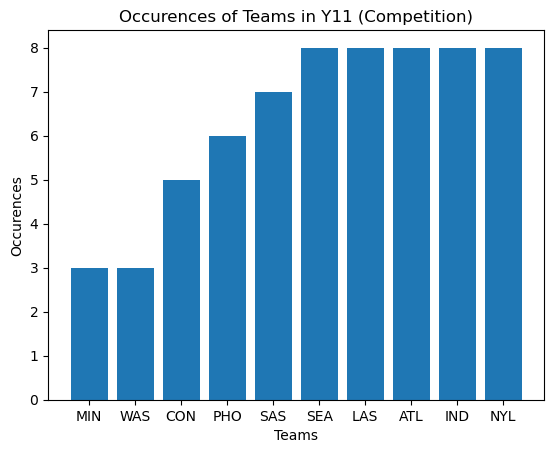

In [169]:
plot_predictions(predictions_dict)